### This script analyses the NWB files and plots the bar plot

In [83]:
# import standard libraries
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.mlab as mlab
from matplotlib.colors import ListedColormap
from matplotlib.ticker import NullFormatter

import numpy as np
from time import time
import csv
import scipy
import pandas as pd 
from scipy import stats

import sklearn
from sklearn.preprocessing import Imputer
from sklearn import preprocessing
from sklearn import clone
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier,
                              AdaBoostClassifier)
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn import manifold, datasets


# clustering algorithm
#from scipy.cluster.hierarchy import dendrogram, linkage
# import os
# get the data with zero mean and variance
# random forest classifier
#from sklearn.datasets import make_classification
# import PCA and LDA
# import the t-SNE method
# import h5py
#import h5py
#import math
# import the normalisation tool
#import normalize_easy
# get the pandas for the processing
# import scipy sparse imputer
#from sklearn.decomposition import PCA
#import numpy as np
#import matplotlib.pyplot as plt
# FDR correction test
#from sklearn.feature_selection import SelectFdr
# save all variables into dat file
#import pandas as pd 


# Plotting options
%matplotlib inline

# Change parameters of the Figure size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 13
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size    

matplotlib.rcParams.update({'font.size': 15})
#plt.style.use(['dark_background'])

In [84]:
# update parameters to make sure the fig size has changed

# Change parameters of the Figure size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 13
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size    


In [85]:
# Loading the data from csv

all_data=pd.read_csv('WG1TS_WG1_WG4_extended.csv')
all_data.head

<bound method DataFrame.head of                                                  path  wyler_grade_type  \
0   OUT_Epilepsy/morphology_data/human/swc/non_upr...                11   
1   OUT_Epilepsy/morphology_data/human/swc/non_upr...                 4   
2   OUT_Epilepsy/morphology_data/human/swc/non_upr...                 4   
3   OUT_Epilepsy/morphology_data/human/swc/non_upr...                11   
4   OUT_Epilepsy/morphology_data/human/swc/non_upr...                11   
5   OUT_Epilepsy/morphology_data/human/swc/non_upr...                 4   
6   OUT_Epilepsy/morphology_data/human/swc/non_upr...                 4   
7   OUT_Epilepsy/morphology_data/human/swc/non_upr...                 1   
8   OUT_Epilepsy/morphology_data/human/swc/non_upr...                11   
9   OUT_Epilepsy/morphology_data/human/swc/non_upr...                 4   
10  OUT_Epilepsy/morphology_data/human/swc/non_upr...                 4   
11  OUT_Epilepsy/morphology_data/human/swc/non_upr...               

# Drop features related to anatomy, i.e. cell position in 3D

In [86]:

dropped_columns=['axon_width',
'cloud_width',
'dendrite_width',
'basal_dendrite_width',
'apical_dendrite_width',
'all_neurites_width',
'axon_height',
'cloud_height',
'dendrite_height',
'basal_dendrite_height',
'apical_dendrite_height',
'all_neurites_height',
'axon_depth',
'axon_relative_soma_depth',
'cloud_depth',
'dendrite_depth',
'dendrite_relative_soma_depth',
'basal_dendrite_depth',
'basal_dendrite_relative_soma_depth',
'apical_dendrite_depth',
'apical_dendrite_relative_soma_depth',
'all_neurites_depth',
'all_neurites_relative_soma_depth',
'axon_compartment_centroid_over_distance_x',
'axon_compartment_centroid_over_distance_y',
'axon_compartment_centroid_over_distance_z',
'axon_compartment_kurt_x',
'axon_compartment_kurt_y',
'axon_compartment_kurt_z',
'axon_compartment_skew_x',
'axon_compartment_skew_y',
'axon_compartment_skew_z',
'axon_compartment_stdev_over_centroid_x',
'axon_compartment_stdev_over_centroid_y',
'axon_compartment_stdev_over_centroid_z',
'axon_compartment_stdev_over_distance_x',
'axon_compartment_stdev_over_distance_y',
'axon_compartment_stdev_over_distance_z',
'axon_compartment_stdev_x',
'axon_compartment_stdev_y',
'axon_compartment_stdev_z',
'axon_first_compartment_moment_x',
'axon_first_compartment_moment_y',
'axon_first_compartment_moment_z',
'axon_height',
'axon_high_x',
'axon_high_y',
'axon_high_z',
'axon_low_x',
'axon_low_y',
'axon_low_z',
'cloud_compartment_kurt_x',
'cloud_compartment_kurt_y',
'cloud_compartment_kurt_z',
'cloud_compartment_skew_x',
'cloud_compartment_skew_y',
'cloud_compartment_skew_z',
'cloud_compartment_stdev_x',
'cloud_compartment_stdev_y',
'cloud_compartment_stdev_z',
'cloud_first_compartment_moment_x',
'cloud_first_compartment_moment_y',
'cloud_first_compartment_moment_z',
'cloud_high_x',
'cloud_high_y',
'cloud_high_z',
'cloud_low_x',
'cloud_low_y',
'cloud_low_z',
'dendrite_bifurcation_centroid_over_distance_x',
'dendrite_bifurcation_centroid_over_distance_y',
'dendrite_bifurcation_centroid_over_distance_z',
'dendrite_bifurcation_kurt_x',
'dendrite_bifurcation_kurt_y',
'dendrite_bifurcation_kurt_z',
'dendrite_bifurcation_skew_x',
'dendrite_bifurcation_skew_y',
'dendrite_bifurcation_skew_z',
'dendrite_bifurcation_stdev_over_centroid_x',
'dendrite_bifurcation_stdev_over_centroid_y',
'dendrite_bifurcation_stdev_over_centroid_z',
'dendrite_bifurcation_stdev_over_distance_x',
'dendrite_bifurcation_stdev_over_distance_y',
'dendrite_bifurcation_stdev_over_distance_z',
'dendrite_bifurcation_stdev_x',
'dendrite_bifurcation_stdev_y',
'dendrite_bifurcation_stdev_z',
'dendrite_compartment_centroid_over_distance_x',
'dendrite_compartment_centroid_over_distance_y',
'dendrite_compartment_centroid_over_distance_z',
'dendrite_compartment_kurt_x',
'dendrite_compartment_kurt_y',
'dendrite_compartment_kurt_z',
'dendrite_compartment_skew_x',
'dendrite_compartment_skew_y',
'dendrite_compartment_skew_z',
'dendrite_compartment_stdev_over_centroid_x',
'dendrite_compartment_stdev_over_centroid_y',
'dendrite_compartment_stdev_over_centroid_z',
'dendrite_compartment_stdev_over_distance_x',
'dendrite_compartment_stdev_over_distance_y',
'dendrite_compartment_stdev_over_distance_z',
'dendrite_compartment_stdev_x',
'dendrite_compartment_stdev_y',
'dendrite_compartment_stdev_z',
'dendrite_first_bifurcation_moment_x',
'dendrite_first_bifurcation_moment_y',
'dendrite_first_bifurcation_moment_z',
'dendrite_first_compartment_moment_x',
'dendrite_first_compartment_moment_y',
'dendrite_first_compartment_moment_z',
'dendrite_high_x',
'dendrite_high_y',
'dendrite_high_z',
'dendrite_low_x',
'dendrite_low_y',
'dendrite_low_z',
'basal_dendrite_compartment_centroid_over_distance_x',
'basal_dendrite_compartment_centroid_over_distance_y',
'basal_dendrite_compartment_centroid_over_distance_z',
'basal_dendrite_compartment_kurt_x',
'basal_dendrite_compartment_kurt_y',
'basal_dendrite_compartment_kurt_z',
'basal_dendrite_compartment_skew_x',
'basal_dendrite_compartment_skew_y',
'basal_dendrite_compartment_skew_z',
'basal_dendrite_compartment_stdev_over_centroid_x',
'basal_dendrite_compartment_stdev_over_centroid_y',
'basal_dendrite_compartment_stdev_over_centroid_z',
'basal_dendrite_compartment_stdev_over_distance_x',
'basal_dendrite_compartment_stdev_over_distance_y',
'basal_dendrite_compartment_stdev_over_distance_z',
'basal_dendrite_compartment_stdev_x',
'basal_dendrite_compartment_stdev_y',
'basal_dendrite_compartment_stdev_z',
'basal_dendrite_first_compartment_moment_x',
'basal_dendrite_first_compartment_moment_y',
'basal_dendrite_first_compartment_moment_z',
'basal_dendrite_high_x',
'basal_dendrite_high_y',
'basal_dendrite_high_z',
'basal_dendrite_low_x',
'basal_dendrite_low_y',
'basal_dendrite_low_z',
'apical_dendrite_bifurcation_centroid_over_distance_x',
'apical_dendrite_bifurcation_centroid_over_distance_y',
'apical_dendrite_bifurcation_centroid_over_distance_z',
'apical_dendrite_bifurcation_kurt_x',
'apical_dendrite_bifurcation_kurt_y',
'apical_dendrite_bifurcation_kurt_z',
'apical_dendrite_bifurcation_skew_x',
'apical_dendrite_bifurcation_skew_y',
'apical_dendrite_bifurcation_skew_z',
'apical_dendrite_bifurcation_stdev_over_centroid_x',
'apical_dendrite_bifurcation_stdev_over_centroid_y',
'apical_dendrite_bifurcation_stdev_over_centroid_z',
'apical_dendrite_bifurcation_stdev_over_distance_x',
'apical_dendrite_bifurcation_stdev_over_distance_y',
'apical_dendrite_bifurcation_stdev_over_distance_z',
'apical_dendrite_bifurcation_stdev_x',
'apical_dendrite_bifurcation_stdev_y',
'apical_dendrite_bifurcation_stdev_z',
'apical_dendrite_compartment_centroid_over_distance_x',
'apical_dendrite_compartment_centroid_over_distance_y',
'apical_dendrite_compartment_centroid_over_distance_z',
'apical_dendrite_compartment_kurt_x',
'apical_dendrite_compartment_kurt_y',
'apical_dendrite_compartment_kurt_z',
'apical_dendrite_compartment_skew_x',
'apical_dendrite_compartment_skew_y',
'apical_dendrite_compartment_skew_z',
'apical_dendrite_compartment_stdev_over_centroid_x',
'apical_dendrite_compartment_stdev_over_centroid_y',
'apical_dendrite_compartment_stdev_over_centroid_z',
'apical_dendrite_compartment_stdev_over_distance_x',
'apical_dendrite_compartment_stdev_over_distance_y',
'apical_dendrite_compartment_stdev_over_distance_z',
'apical_dendrite_compartment_stdev_x',
'apical_dendrite_compartment_stdev_y',
'apical_dendrite_compartment_stdev_z',
'apical_dendrite_first_bifurcation_moment_x',
'apical_dendrite_first_bifurcation_moment_y',
'apical_dendrite_first_bifurcation_moment_z',
'apical_dendrite_first_compartment_moment_x',
'apical_dendrite_first_compartment_moment_y',
'apical_dendrite_first_compartment_moment_z',
'apical_dendrite_high_x',
'apical_dendrite_high_y',
'apical_dendrite_high_z',
'apical_dendrite_low_x',
'apical_dendrite_low_y',
'apical_dendrite_low_z',
'all_neurites_compartment_centroid_over_distance_x',
'all_neurites_compartment_centroid_over_distance_y',
'all_neurites_compartment_centroid_over_distance_z',
'all_neurites_compartment_kurt_x',
'all_neurites_compartment_kurt_y',
'all_neurites_compartment_kurt_z',
'all_neurites_compartment_skew_x',
'all_neurites_compartment_skew_y',
'all_neurites_compartment_skew_z',
'all_neurites_compartment_stdev_over_centroid_x',
'all_neurites_compartment_stdev_over_centroid_y',
'all_neurites_compartment_stdev_over_centroid_z',
'all_neurites_compartment_stdev_over_distance_x',
'all_neurites_compartment_stdev_over_distance_y',
'all_neurites_compartment_stdev_over_distance_z',
'all_neurites_compartment_stdev_x',
'all_neurites_compartment_stdev_y',
'all_neurites_compartment_stdev_z',
'all_neurites_compartment_stdev_x',
'all_neurites_first_compartment_moment_x',
'all_neurites_first_compartment_moment_y',
'all_neurites_first_compartment_moment_z',
'all_neurites_high_x',
'all_neurites_high_y',
'all_neurites_high_z',
'all_neurites_low_x',
'all_neurites_low_y',
'all_neurites_low_z',
'all_neurites_compartment_centroid_over_distance_x',
'all_neurites_compartment_centroid_over_distance_y',
'all_neurites_compartment_centroid_over_distance_z',
'all_neurites_compartment_kurt_x',
'all_neurites_compartment_kurt_y',
'all_neurites_compartment_kurt_z',
'all_neurites_compartment_skew_x',
'all_neurites_compartment_skew_y',
'all_neurites_compartment_skew_z']

# Extract features from pandas

In [87]:
# remove path column
all_data_core=all_data.loc[:, all_data.columns != 'path']

# remove wyler grade column
all_data_core=all_data_core.loc[:, all_data_core.columns != 'wyler_grade_type']

# drope the columns with too many NaN's in the data, dropNaN returns a new dataframe

# when there are more than 5 NaNs, we do not use this feature!
all_data_core=all_data_core.dropna(thresh=len(all_data_core)-5, axis=1)

# DROP ALL NON-MORPHOLOGICAL FEATURES
all_data_core=all_data_core.drop(dropped_columns, axis=1)

# create the numpy array
all_features=all_data_core.as_matrix()

# determine the number of features
n_features=len(all_features[0,:])
print 'Number of features'
print n_features

print '\n'

print 'all_features shape'
print all_features.shape

Number of features
99


all_features shape
(61, 99)


/Users/Anatoly/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()


# Plot feature names

In [88]:

feature_names=list(all_data_core.columns.values)

# print the number of features
for i, item in enumerate(feature_names):
    print str(i)+str(': ')+ str(feature_names[i])
    
    # create a string with particular sequence and add it to the library


0: axon_average_diameter
1: axon_early_branch
2: axon_max_branch_order
3: axon_max_euclidean_distance
4: axon_max_path_distance
5: axon_neurites_over_branches
6: axon_num_bifurcations
7: axon_num_branches
8: axon_num_neurites
9: axon_num_nodes
10: axon_num_outer_bifurcations
11: axon_num_stems
12: axon_num_tips
13: axon_soma_distance
14: axon_soma_surface
15: axon_soma_theta
16: axon_total_length
17: axon_total_surface
18: axon_total_volume
19: dendrite_average_diameter
20: dendrite_bifurcation_angle_local
21: dendrite_bifurcation_angle_remote
22: dendrite_contraction
23: dendrite_early_branch
24: dendrite_max_branch_order
25: dendrite_max_euclidean_distance
26: dendrite_max_path_distance
27: dendrite_mean_fragmentation
28: dendrite_mean_parent_daughter_ratio
29: dendrite_neurites_over_branches
30: dendrite_num_bifurcations
31: dendrite_num_branches
32: dendrite_num_neurites
33: dendrite_num_nodes
34: dendrite_num_outer_bifurcations
35: dendrite_num_stems
36: dendrite_num_tips
37: dend

# Show data matrix shape

In [89]:
# Define the cell type and plot the matrix

#define the cell type
cell_type=all_data.as_matrix(columns=['wyler_grade_type'])
#cell_type=np.array(cell_type)
#print cell_type

print cell_type.shape

(61, 1)


/Users/Anatoly/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


# Plot the cell type information

In [90]:
# run once

print 'Plot the cell type'

# create the cell type with only 2 classes
cell_type_14=np.array(cell_type)
cell_type_14[np.where(cell_type_14 == 11)]=1
cell_type_14=np.concatenate(cell_type_14,axis=0)

# concatenate the previous cell_type too
cell_type=np.concatenate(cell_type,axis=0)

print cell_type_14

Plot the cell type
[1 4 4 1 1 4 4 1 1 4 4 1 1 4 4 4 1 4 1 1 1 4 4 4 1 1 4 4 1 1 1 1 1 1 4 1 4
 1 1 1 1 1 1 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]


# Visualise the original data matrix

Data size
(61, 99)


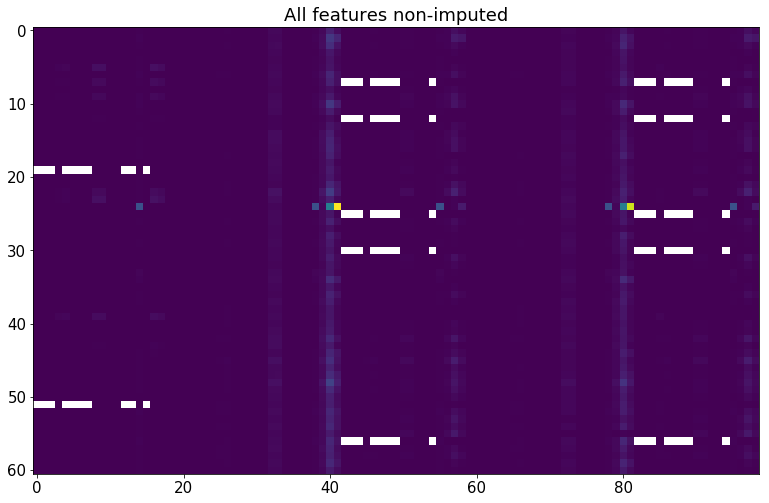

In [91]:

plt.imshow(all_features)
plt.title('All features non-imputed')

print 'Data size'
print all_features.shape

# Impute NaNs from the columns by replacing with the median

Data length
61


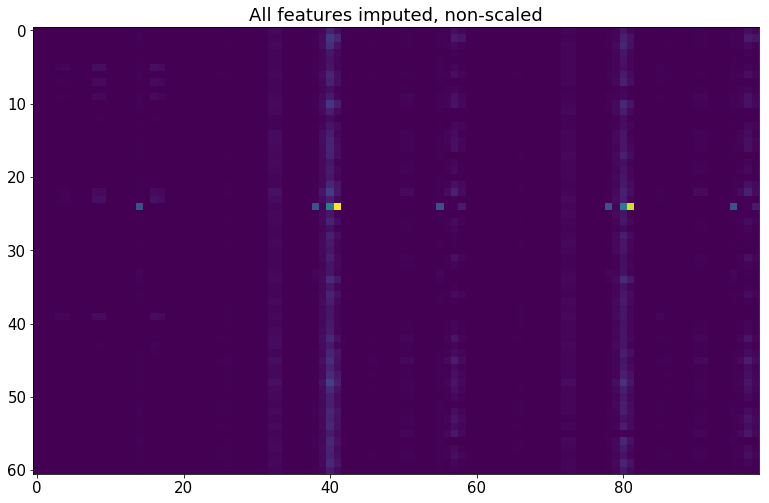

In [92]:

# impute all NaNs in the array and replace with the mean
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
imp.fit(all_features)

# replace all NaNs
all_features_new=imp.transform(all_features)

plt.imshow(all_features_new)
plt.title('All features imputed, non-scaled')

print 'Data length'
print len(all_features_new)

# Save the dataset, feature and labeled csv

In [93]:
# save the data matrix to csv
np.savetxt('ALL_MORPHOLOGIES.csv',all_features_new, delimiter=" ")

# save the cell_type_labels
np.savetxt('ALL_MORPHOLOGIES_LABELS.csv',cell_type_14, delimiter=" ")

# save the feature names
with open('ALL_CONDUCTANCES_MODELS_FEATURE_NAMES.csv', 'wb') as myfile:
    wr = csv.writer(myfile, dialect='excel')
    wr.writerow(feature_names)

# Pairwise comparison with Bonferoni correction: WG1 vs WG4

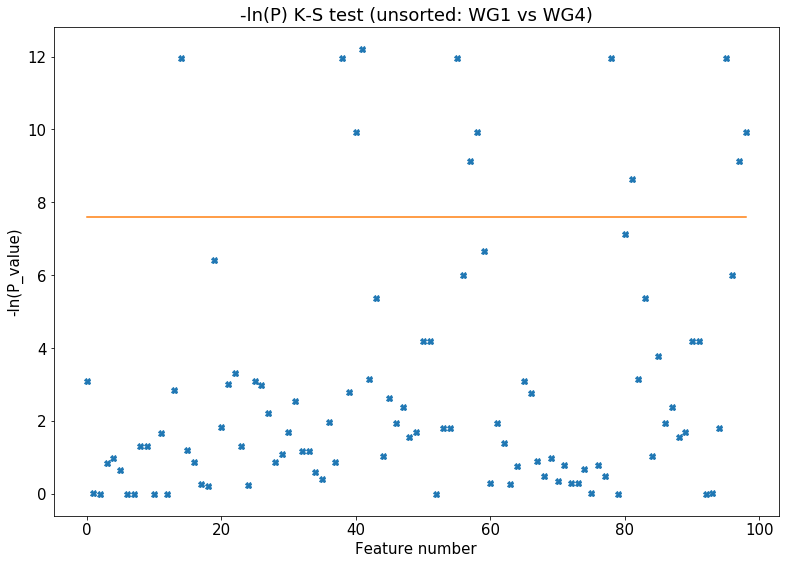

In [94]:
# set up the p-values vector
p_values=np.zeros(n_features)


for i in range(0,n_features):
    # test for the loop
    # take only the indexes of the cell_type specific elements
    wg1=np.zeros(1)
    wg4=np.zeros(1)
    wg1=all_features_new[np.where(cell_type_14==1),i]
    wg4=all_features_new[np.where(cell_type_14==4),i]
    # do the stat test and save the results
    d,p=stats.ks_2samp(wg1[0],wg4[0])
    p_values[i]=p

# plot the results of feature comparison

#plt.plot(p_values,'X')

# significance level
alpha_level=0.05
p_level=alpha_level/n_features
sign_level=np.zeros(n_features)
sign_level[:]=-np.log(p_level)
log_p=-np.log(p_values) # initial log_p


plt.plot(np.arange(0,n_features,1),log_p,'X',np.arange(0,n_features,1),sign_level)
plt.ylabel('-ln(P_value)')
plt.xlabel('Feature number')
plt.title('-ln(P) K-S test (unsorted: WG1 vs WG4)')

# save figure to eps
plt.savefig('all_morpho_features_KS_bonferoni_stars.eps',format='eps',dpi=300)

# Show pair-wise feature comparisons as box plots

In [99]:
p

4.9265882893513863e-05

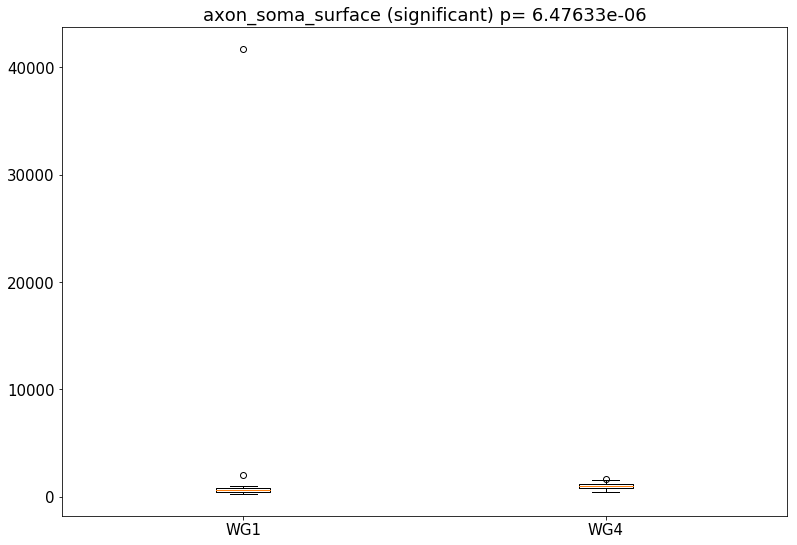

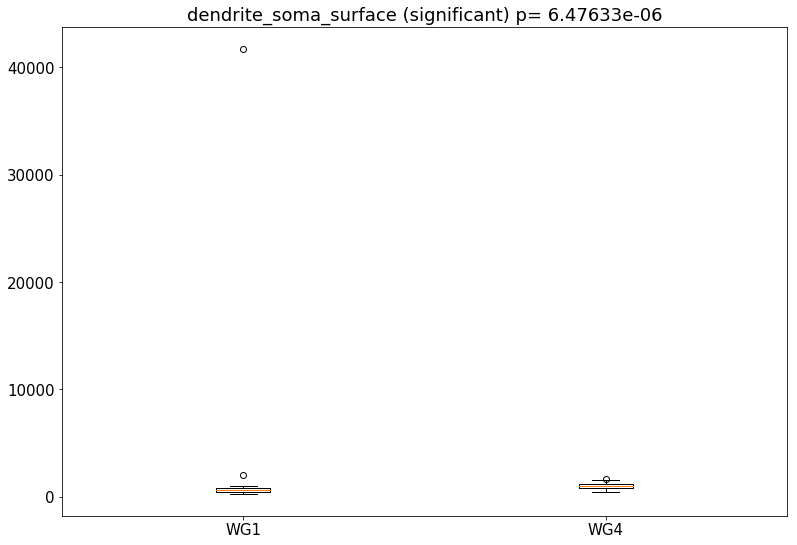

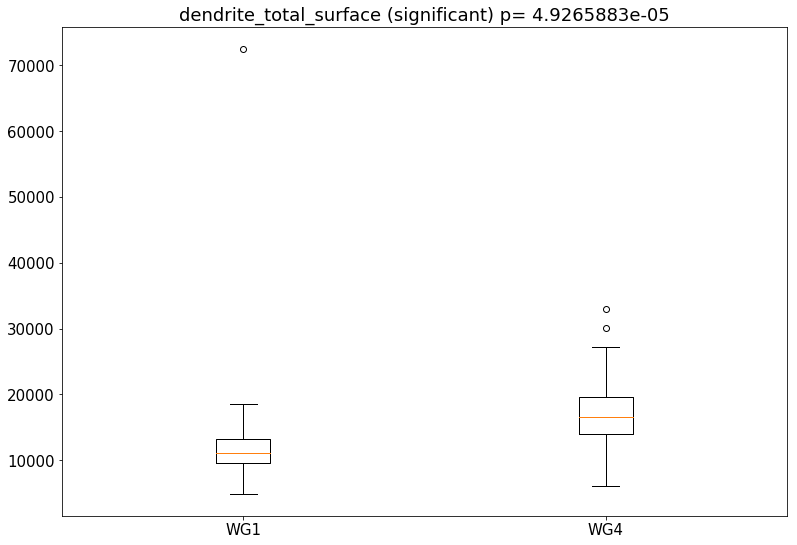

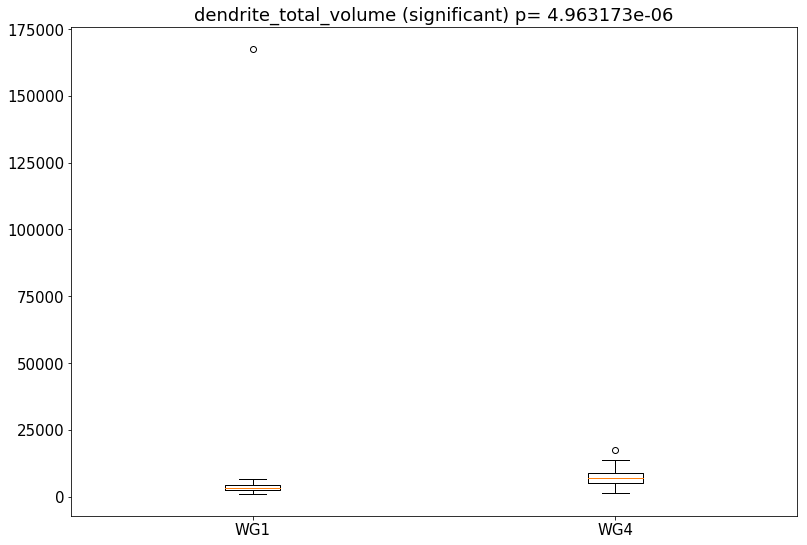

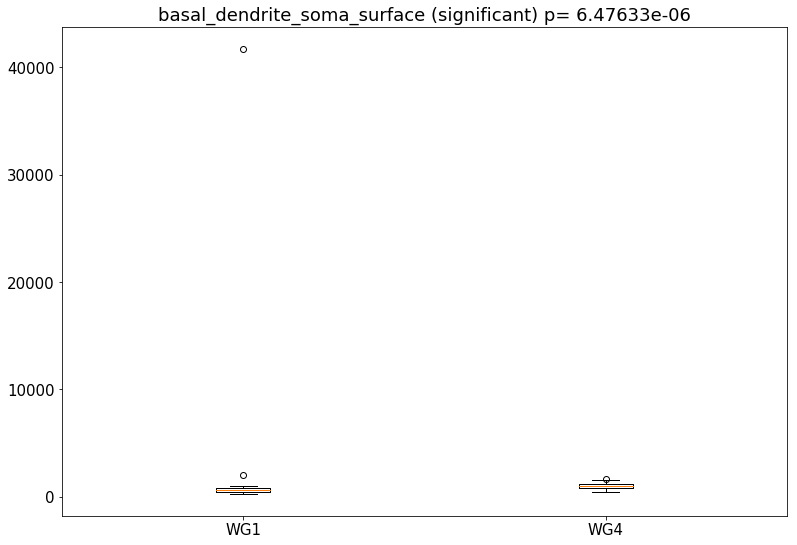

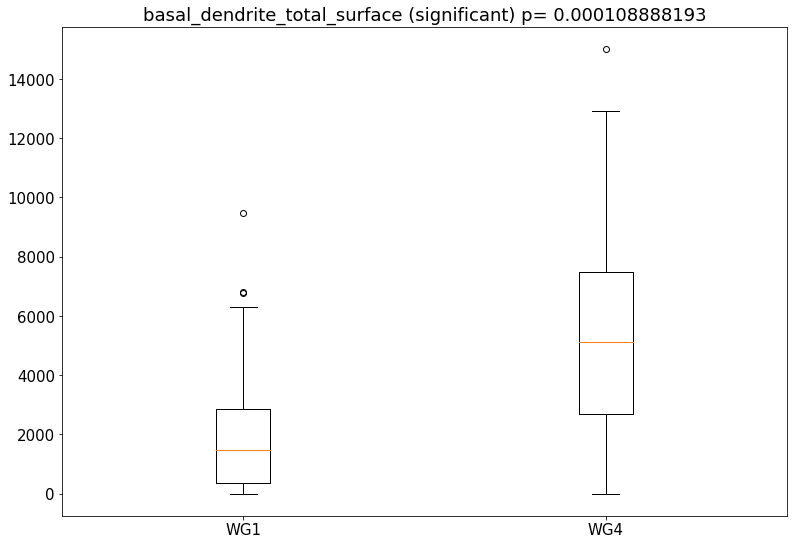

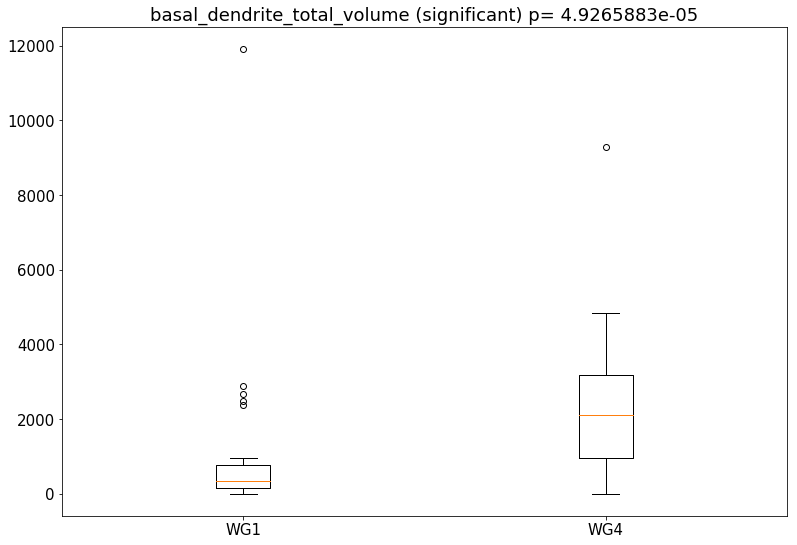

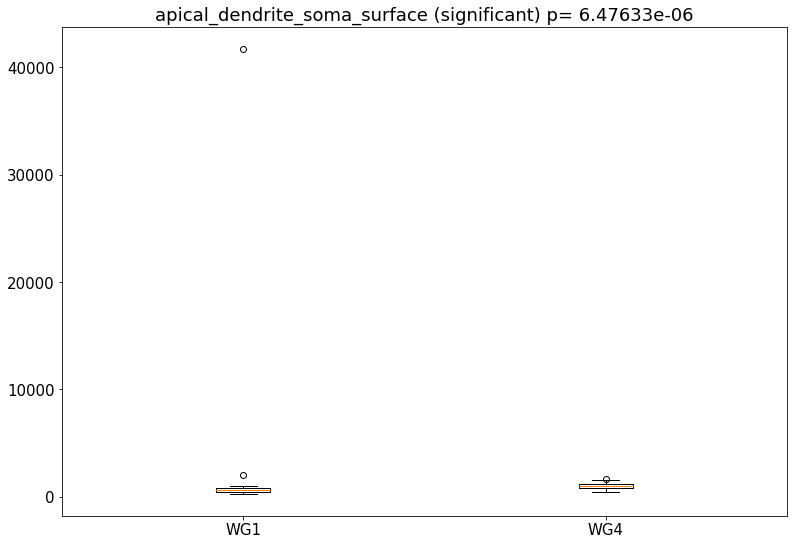

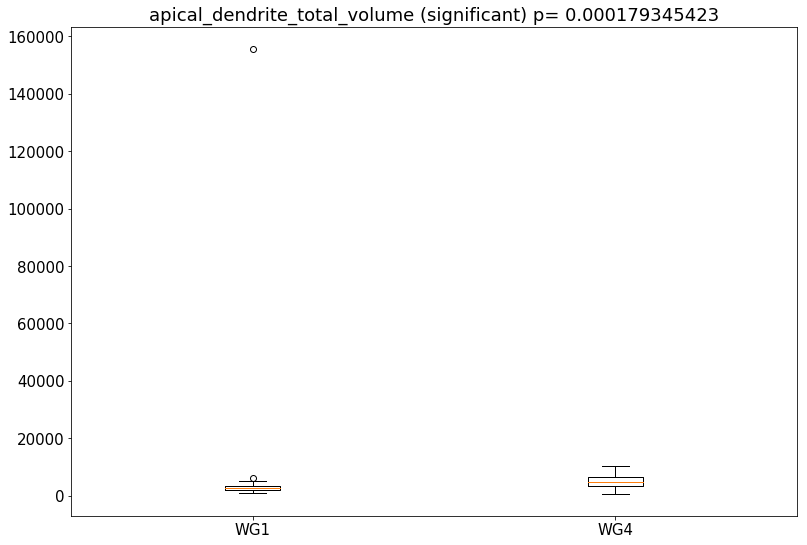

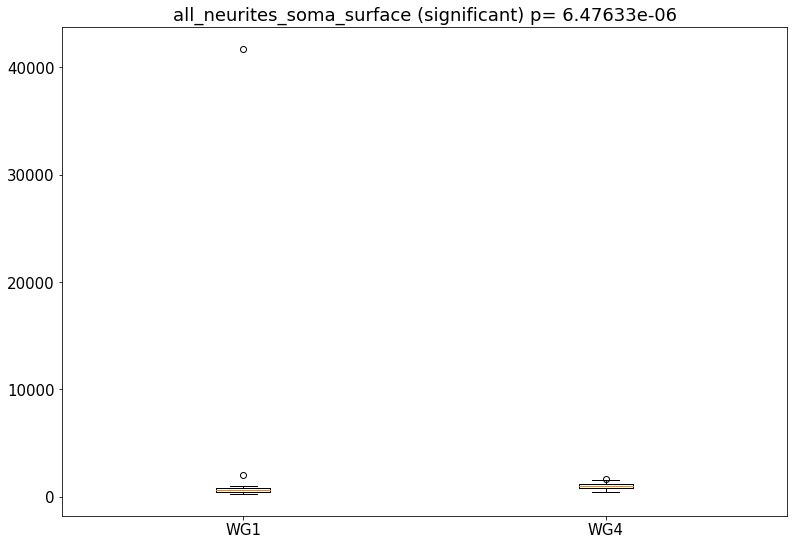

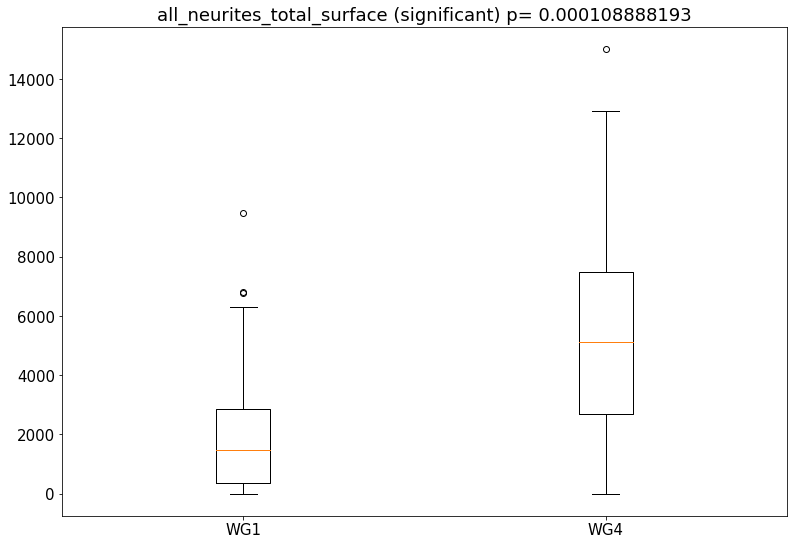

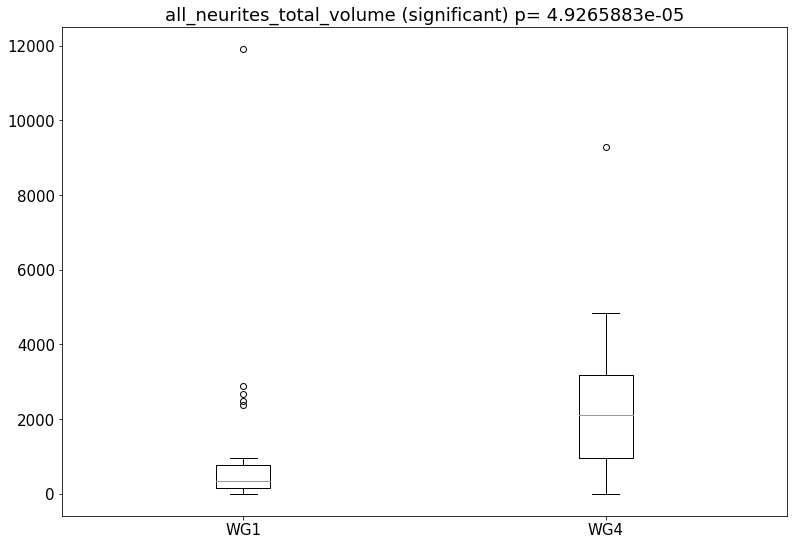

In [103]:

for i in np.arange(n_features):
    # test for the loop
    # take only the indexes of the cell_type specific elements
    wg1=np.zeros(1)
    wg4=np.zeros(1)
    wg1=all_features_new[np.where(cell_type_14==1),i]
    wg4=all_features_new[np.where(cell_type_14==4),i]
    # do the stat test and save the results
    d,p=stats.ks_2samp(wg1[0],wg4[0])
#   p_values[i]=p
    
#    fig, ax = plt.subplots()
#    labels=['WG1','WG4']
    
#    if p<alpha_level/n_features:
#        plt.boxplot([np.transpose(wg1),np.transpose(wg4)])
#        plt.title(feature_names[i]+str(' (significant)') +str(' p= ') +str(np.round(p,12)))
#    else:
#        plt.title(feature_names[i]+str(' (non-significant)') +str(' p= ') +str(np.round(p,12)))
#    
#    ax.xaxis.set_ticks_position('bottom')
#    ax.set_xticks(np.arange(1, len(labels) + 1))
#    ax.set_xticklabels(labels)
    
    if p<alpha_level/n_features:
        fig, ax = plt.subplots()
        labels=['WG1','WG4']
#    plt.violinplot([feature_1,feature_2])
        plt.boxplot([np.transpose(wg1),np.transpose(wg4)])
        plt.title(feature_names[i]+str(' (significant)') +str(' p= ') +str(np.round(p,12)))
#    else:
#        plt.title(feature_names[i]+str(' (non-significant)') +str(' p= ') +str(np.round(p,12)))
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels)


First 10 p_values:99 features
[ 0.04492498  0.99803396  0.9999882   0.43734076  0.38150474  0.51823737
  0.9999882   0.9999882   0.27436418  0.27436418]




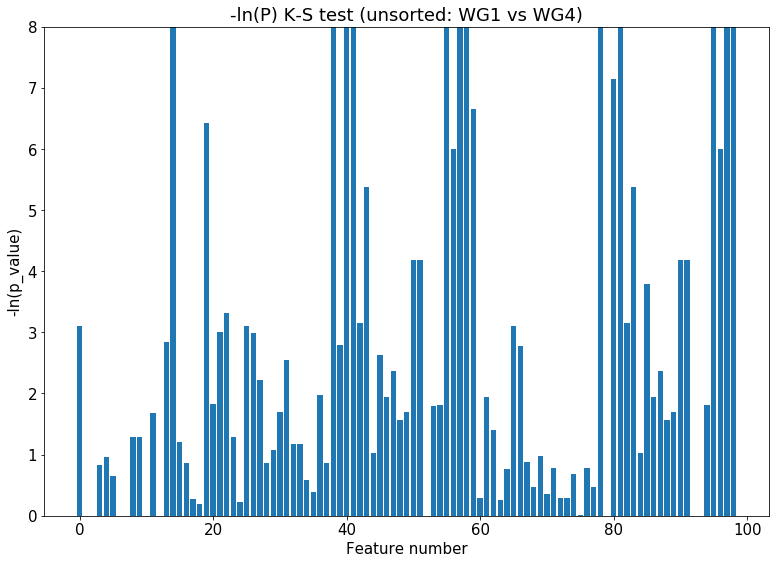

In [104]:
# PLOT p-values as a bar plot

# p-values order is different from all other features

print 'First 10 p_values:' +str(len(p_values)) +str(' features')
print p_values[0:10]
print '\n'

# significance level
p_level=alpha_level/n_features
sign_level=np.zeros(n_features)
sign_level[:]=-np.log(p_level)
log_p=-np.log(p_values) # initial log_p


plt.bar(np.arange(0,n_features,1),log_p)
plt.ylabel('-ln(p_value)')
plt.xlabel('Feature number')
plt.ylim(ymax=8)
plt.title('-ln(P) K-S test (unsorted: WG1 vs WG4)')

# save figure to eps
plt.savefig('all_morpho_features_KS_bonferoni.eps',format='eps',dpi=300)

# Plot 10 most significant features

Names of 10 important features:


dendrite_total_volume
all_neurites_soma_surface
axon_soma_surface
basal_dendrite_soma_surface
apical_dendrite_soma_surface
dendrite_soma_surface
all_neurites_total_volume
basal_dendrite_total_volume
dendrite_total_surface
basal_dendrite_total_surface


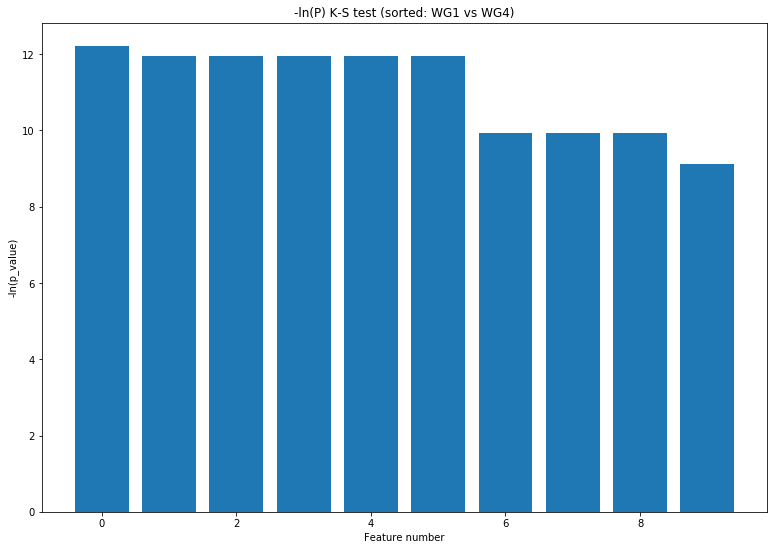

In [29]:
# significance level
p_level=0.05/n_features
sign_level=np.zeros(n_features)
sign_level[:]=-np.log(p_level)
log_p=-np.log(p_values) # initial log_p
# feature order
feature_order_idx=np.flip(np.argsort(-np.log(p_values)),0)
feature_to_show=10


plt.bar(np.arange(0,feature_to_show,1),log_p[feature_order_idx[0:feature_to_show]])
plt.ylabel('-ln(p_value)')
plt.xlabel('Feature number')
plt.title('-ln(P) K-S test (sorted: WG1 vs WG4)')

# show the feature order idx
print 'Names of 10 important features:'
print '\n'
for i in range(feature_to_show):
    print feature_names[feature_order_idx[i]]

# save figure to eps
plt.savefig('all_morpho_features_KS_bonferoni_10most_significant.eps',format='eps',dpi=300)

# Pairwise comparison between WG1 and WG1TS features (if TS is different)

Text(0.5,1,'-log(P) K-S test (unsorted: WG1 vs. WG1TS)')

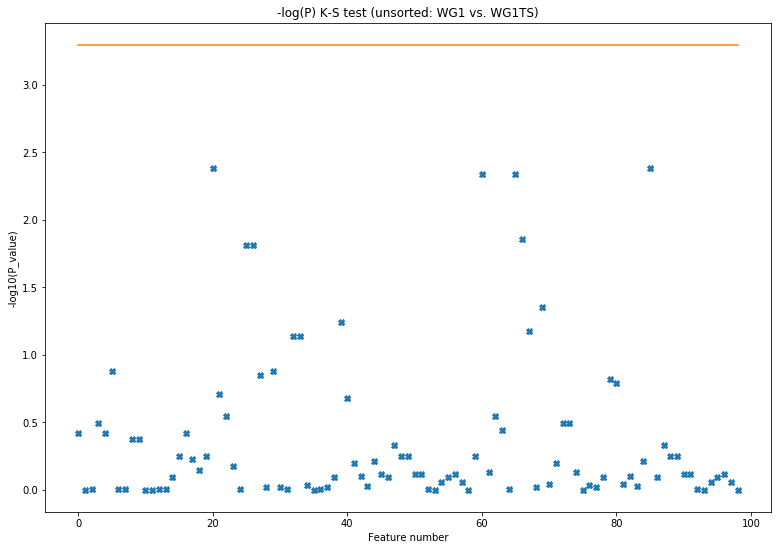

In [30]:
# set up the p-values vector
p_values_wgts=np.zeros(n_features)


for i in range(0,n_features):
    # test for the loop
    # take only the indexes of the cell_type specific elements
    wg1=np.zeros(1)
    wg1ts=np.zeros(1)
    wg1=all_features_new[np.where(cell_type==1),i]
    wg1ts=all_features_new[np.where(cell_type==11),i]
    # do the stat test and save the results
    d,p=stats.ks_2samp(wg1[0],wg1ts[0])
    p_values_wgts[i]=p

# plot the results of feature comparison

#plt.plot(p_values,'X')

# significance level
p_level=0.05/n_features
sign_level=np.zeros(n_features)
sign_level[:]=-np.log10(p_level)
log_p=-np.log10(p_values_wgts) # initial log_p


plt.plot(np.arange(0,n_features,1),log_p,'X',np.arange(0,n_features,1),sign_level)
plt.ylabel('-log10(P_value)')
plt.xlabel('Feature number')
plt.title('-log(P) K-S test (unsorted: WG1 vs. WG1TS)')

# save figure to eps
#plt.savefig('all_morpho_features_KS_bonferoni_stars.eps',format='eps',dpi=300)

# Scale the feature matrix

Data length
61


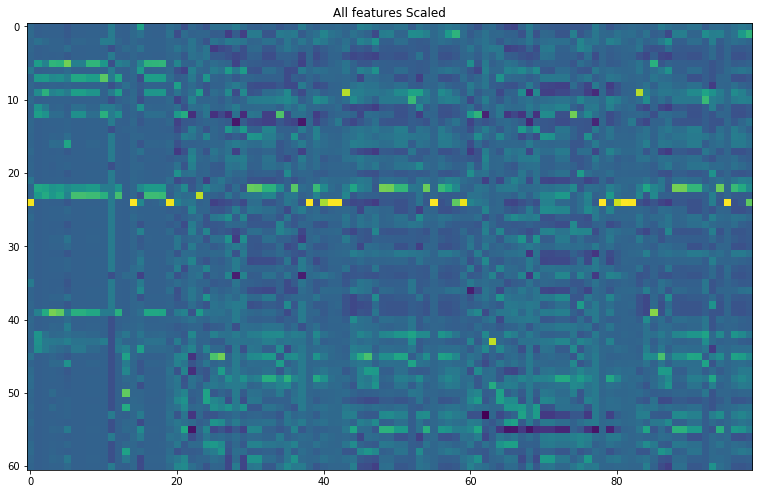

In [32]:
# Normalise all columns of the array
all_features_new_scaled = preprocessing.scale(all_features_new)

# show the normalised data
plt.imshow(all_features_new_scaled)
plt.title('All features Scaled')

# bring all elements to the same type
all_features_new_scaled.astype(float)

# show the length
print 'Data length'
print len(all_features_new_scaled)

# Save scaled features to CSV

In [105]:

df = pd.DataFrame(all_features_new_scaled.astype(float))
df.to_csv("morpho_features_scaled.csv")


np.savetxt('morpho_features_cell_types.csv', cell_type.astype(float), delimiter=',')

# PCA on data WG1 vs WG1TS vs WG4

explained variance ratio (first two components): [ 0.20565248  0.15594709]


Text(0,0.5,'Principal component 2')

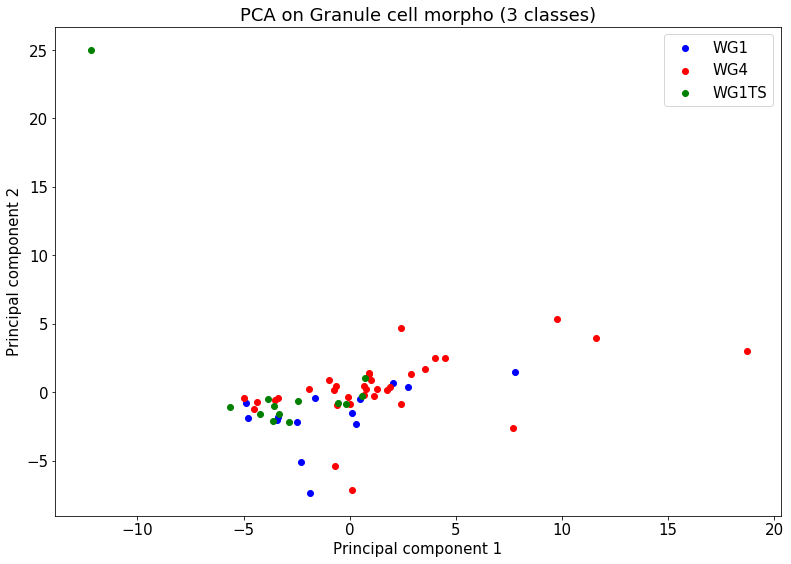

In [106]:

pca = PCA(n_components=2)
# get the cell positions in the new coordinates
X_r = pca.fit(all_features_new_scaled).transform(all_features_new_scaled)

# print the variance explained
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

# create the colors vectors
#colors = np.heaviside(cell_type-2,1)

# all indexes of WG
wg1_idx=np.zeros(1)
wg4_idx=np.zeros(1)
wg1ts_idx=np.zeros(1)
wg1_idx=np.where(cell_type==1)
wg4_idx=np.where(cell_type==4)
wg1ts_idx=np.where(cell_type==11)

fig, ax = plt.subplots()

plt.scatter(X_r[wg1_idx, 0],X_r[wg1_idx, 1],c='blue')
plt.scatter(X_r[wg4_idx, 0],X_r[wg4_idx, 1],c='red')
plt.scatter(X_r[wg1ts_idx, 0],X_r[wg1ts_idx, 1],c='green')

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA on Granule cell morpho (3 classes)')
plt.legend(['WG1','WG4','WG1TS'])
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')

# PCA on data WG1 vs WG4

explained variance ratio (first two components): [ 0.20565248  0.15594709]


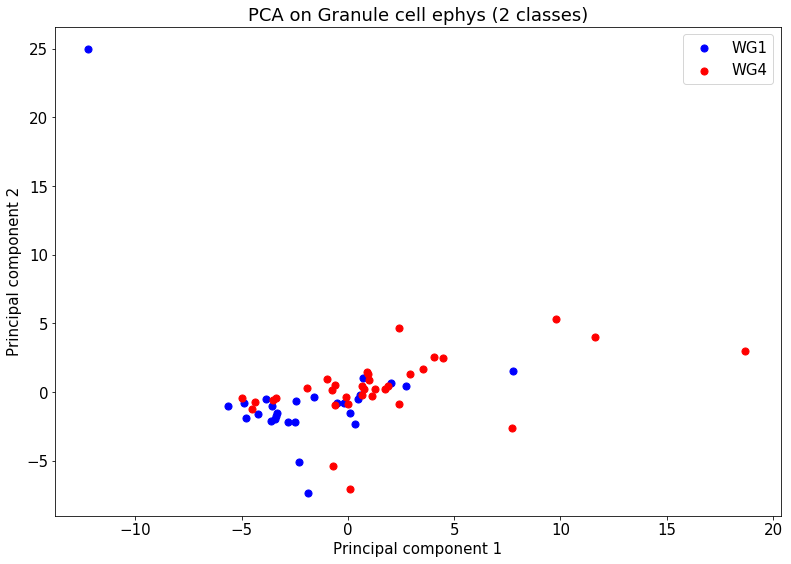

In [107]:

pca = PCA(n_components=2)
# get the cell positions in the new coordinates
X_r = pca.fit(all_features_new_scaled).transform(all_features_new_scaled)


# create the cell type with only 2 classes
cell_type_14=np.array(cell_type)
cell_type_14[np.where(cell_type_14 == 11)]=1

# print the variance explained
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

# create the colors vectors
#colors = np.heaviside(cell_type-2,1)

# all indexes of WG
wg1_idx=np.zeros(1)
wg4_idx=np.zeros(1)
wg1_idx=np.where(cell_type_14==1)
wg4_idx=np.where(cell_type_14==4)

fig, ax = plt.subplots()

plt.scatter(X_r[wg1_idx, 0],X_r[wg1_idx, 1],c='blue',s=50)
plt.scatter(X_r[wg4_idx, 0],X_r[wg4_idx, 1],c='red',s=50)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA on Granule cell ephys (2 classes)')
plt.legend(['WG1','WG4'])
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')

# save figure
plt.savefig('PCA_WG1WG1TS_WG4.eps', format='eps', dpi=300)

# Do the PCA on all data features and show the output

Text(0.5,1,'All features in PCA-space')

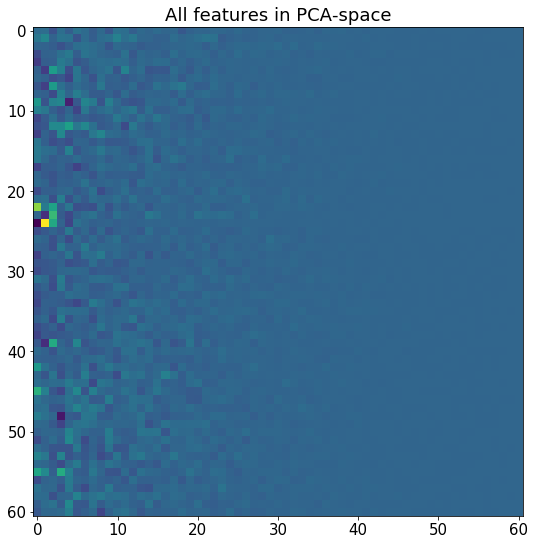

In [108]:

pca = PCA(n_components=n_features)
# get the cell positions in the new coordinates
X_r = pca.fit(all_features_new_scaled).transform(all_features_new_scaled)

# show all features projected in the PCA space

plt.imshow(X_r)
plt.title('All features in PCA-space')

# Random forest classifier on post-PCA data, 2 classes (test for PCA)



Random forest classification efficiency: 0.688524590164
2 classes on post-PCA data


Text(0,0.5,'Feature weight')

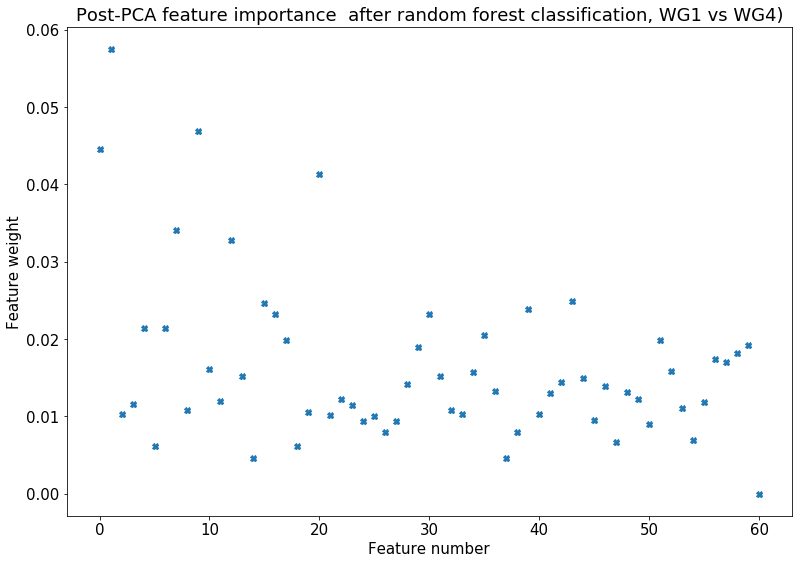

In [109]:
# do the random forest classifier on PCA-projected data
# CELL_TYPES FOR WG1, WG4, WG1TS

clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=True, random_state=0, verbose=0, warm_start=False)

clf.fit(X_r, cell_type_14)

oob_error = 1 - clf.oob_score_
print '\n'
print 'Random forest classification efficiency: ' + str(clf.oob_score_)


print '2 classes on post-PCA data'
plt.plot(clf.feature_importances_,'X')
plt.title('Post-PCA feature importance  after random forest classification, WG1 vs WG4)')
plt.xlabel('Feature number')
plt.ylabel('Feature weight')

# Original features weight after random forest classification, WG1 vs WG4

Random forest classification score: 1.0


Random forest classification performance: 0.72131147541
2 classes
Sum of feature importances: 1.0
Order of features
[95 40 55 38 14 78 41 57 58 98 81 83 15 43 90 19 59 42 80 51 82 13 96  9 97
 18 22 50 85 91 21 31  5  8  3 25  4 26 44 16 47 45 68 20 23 86 61 17 89 28
 66 77 54 84 69 71 29 49 36 32 24 62 73 94 37 88 46 60 39 70 27 48 33  0 74
 67 76 56 30 65 79 63 72 64 53  6 93 87 12  1  7 92 35  2 34 11 10 75 52]


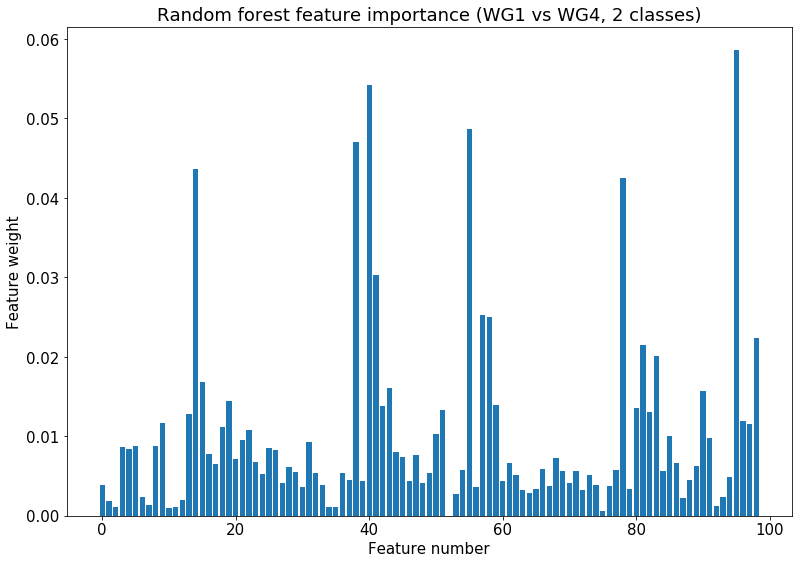

In [110]:
# do random forest classifier on original data

# CELL_TYPES FOR WG1+WG1TS, WG4

clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=True, random_state=0, verbose=0, warm_start=False)

#RandomForestClassifier(max_depth=None, random_state=0)
clf.fit(all_features_new_scaled, cell_type_14)

# get the scores of the trees and pring them
scores = clf.score(all_features_new_scaled, cell_type_14)
print 'Random forest classification score: ' + str(scores)

oob_error = clf.oob_score_
print '\n'
print 'Random forest classification performance: ' + str(oob_error)

print '2 classes'
feature_importance=clf.feature_importances_

# [np.flip(np.argsort(feature_importance),0)]
plt.bar(np.arange(0,n_features,1), feature_importance)


plt.title('Random forest feature importance (WG1 vs WG4, 2 classes)')
plt.xlabel('Feature number')
plt.ylabel('Feature weight')

#plt.xticks(np.arange(0,n_features,1),np.flip(np.argsort(feature_importance),0))

print 'Sum of feature importances: ' + str(np.sum(clf.feature_importances_))

print 'Order of features'
print np.flip(np.argsort(feature_importance),0)



#plt.bar(np.arange(0,n_features,1),log_p)

plt.savefig('Random_forest_WG1WG1TS_WG4_weights.eps', format='eps', dpi=300)

# Show 10 most important features (highest weights)

Names of the important features:


all_neurites_soma_surface
dendrite_total_surface
basal_dendrite_soma_surface
dendrite_soma_surface
axon_soma_surface
apical_dendrite_soma_surface
dendrite_total_volume
basal_dendrite_total_surface
basal_dendrite_total_volume
all_neurites_total_volume


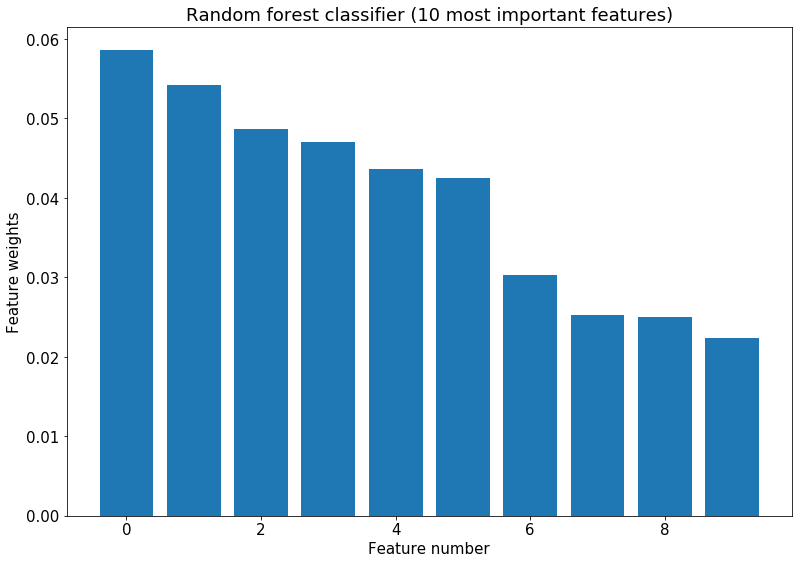

In [111]:


# feature order
feature_order_idx=np.flip(np.argsort(feature_importance),0)
feature_to_show=10


plt.bar(np.arange(0,feature_to_show,1),feature_importance[feature_order_idx[0:feature_to_show]])
plt.ylabel('Feature weights')
plt.xlabel('Feature number')
plt.title('Random forest classifier (10 most important features)')

# show the feature order idx
print 'Names of the important features:'
print '\n'
for i in range(feature_to_show):
    print feature_names[feature_order_idx[i]]

# save figure to eps
plt.savefig('all_morpho_features_random_forest_10_largest.eps',format='eps',dpi=300)

# Classify the features dataset in the original feature space WG1 vs WG4

('DecisionTree with features', [0, 1], 'has a score of', 0.88524590163934425)
('RandomForest with 200 estimators with features', [0, 1], 'has a score of', 0.88524590163934425)
('ExtraTrees with 200 estimators with features', [0, 1], 'has a score of', 0.88524590163934425)
('AdaBoost with 200 estimators with features', [0, 1], 'has a score of', 0.88524590163934425)
('DecisionTree with features', [0, 2], 'has a score of', 0.88524590163934425)
('RandomForest with 200 estimators with features', [0, 2], 'has a score of', 0.88524590163934425)
('ExtraTrees with 200 estimators with features', [0, 2], 'has a score of', 0.88524590163934425)
('AdaBoost with 200 estimators with features', [0, 2], 'has a score of', 0.88524590163934425)
('DecisionTree with features', [2, 3], 'has a score of', 0.98360655737704916)
('RandomForest with 200 estimators with features', [2, 3], 'has a score of', 0.98360655737704916)
('ExtraTrees with 200 estimators with features', [2, 3], 'has a score of', 0.983606557377049

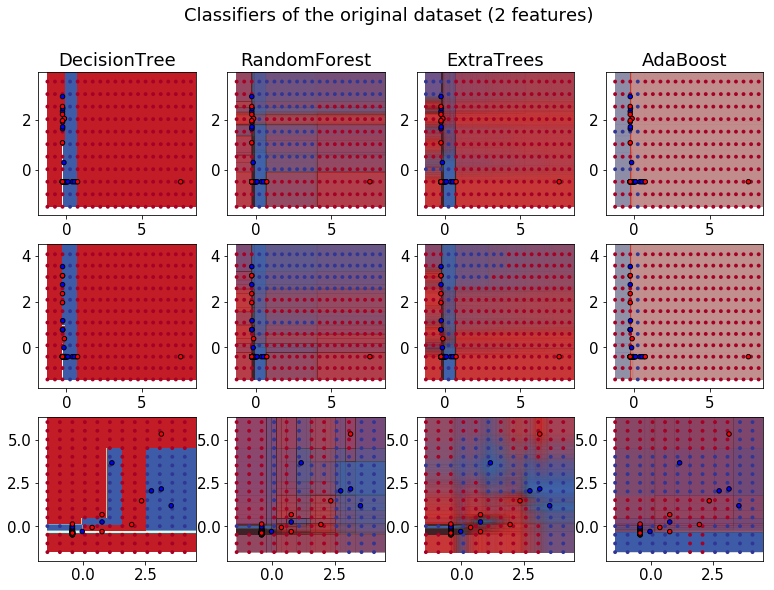

In [112]:

# Parameters
n_classes = 2
n_estimators = 200
cmap = plt.cm.RdYlBu
plot_step = 0.02  # fine step width for decision surface contours
plot_step_coarser = 0.5  # step widths for coarse classifier guesses
RANDOM_SEED = 13  # fix the seed on each iteration

plot_idx = 1

models = [DecisionTreeClassifier(max_depth=None),
          RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=True, random_state=0, verbose=0, warm_start=False),
          ExtraTreesClassifier(n_estimators=n_estimators),
          AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),
                             n_estimators=n_estimators)]

for pair in ([0, 1], [0, 2], [2, 3]):
    for model in models:
        # We only take the two corresponding features

        X = all_features_new_scaled[:, pair]
        y = cell_type_14

        # Shuffle
        idx = np.arange(X.shape[0])
        np.random.seed(RANDOM_SEED)
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]

        # Standardize
#        mean = X.mean(axis=0)
#        std = X.std(axis=0)
#        X = (X - mean) / std

        # Train
        clf = clone(model)
        clf = model.fit(X, y)

        scores = clf.score(X, y)
        # Create a title for each column and the console by using str() and
        # slicing away useless parts of the string
        model_title = str(type(model)).split(
            ".")[-1][:-2][:-len("Classifier")]

        model_details = model_title
        if hasattr(model, "estimators_"):
            model_details += " with {} estimators".format(
                len(model.estimators_))
        print(model_details + " with features", pair,
              "has a score of", scores)

        plt.subplot(3, 4, plot_idx)
        if plot_idx <= len(models):
            # Add a title at the top of each column
            plt.title(model_title)

        # Now plot the decision boundary using a fine mesh as input to a
        # filled contour plot
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))

        # Plot either a single DecisionTreeClassifier or alpha blend the
        # decision surfaces of the ensemble of classifiers
        if isinstance(model, DecisionTreeClassifier):
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            cs = plt.contourf(xx, yy, Z, cmap=cmap)
        else:
            # Choose alpha blend level with respect to the number
            # of estimators
            # that are in use (noting that AdaBoost can use fewer estimators
            # than its maximum if it achieves a good enough fit early on)
            estimator_alpha = 1.0 / len(model.estimators_)
            for tree in model.estimators_:
                Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
                Z = Z.reshape(xx.shape)
                cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)

        # Build a coarser grid to plot a set of ensemble classifications
        # to show how these are different to what we see in the decision
        # surfaces. These points are regularly space and do not have a
        # black outline
        xx_coarser, yy_coarser = np.meshgrid(
            np.arange(x_min, x_max, plot_step_coarser),
            np.arange(y_min, y_max, plot_step_coarser))
        Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(),
                                         yy_coarser.ravel()]
                                         ).reshape(xx_coarser.shape)
        cs_points = plt.scatter(xx_coarser, yy_coarser, s=15,
                                c=Z_points_coarser, cmap=cmap,
                                edgecolors="none")

        # Plot the training points, these are clustered together and have a
        # black outline
        plt.scatter(X[:, 0], X[:, 1], c=y,
                    cmap=ListedColormap(['r', 'y', 'b']),
                    edgecolor='k', s=20)
        plot_idx += 1  # move on to the next plot in sequence

plt.suptitle("Classifiers of the original dataset (2 features)")
plt.axis("tight")

plt.show()

# Classify the features dataset in the PCA space: 2 classes

('DecisionTree with features', [0, 1], 'has a score of', 1.0)
('RandomForest with 50 estimators with features', [0, 1], 'has a score of', 1.0)
('ExtraTrees with 50 estimators with features', [0, 1], 'has a score of', 1.0)
('AdaBoost with 50 estimators with features', [0, 1], 'has a score of', 1.0)
('DecisionTree with features', [0, 2], 'has a score of', 1.0)
('RandomForest with 50 estimators with features', [0, 2], 'has a score of', 1.0)
('ExtraTrees with 50 estimators with features', [0, 2], 'has a score of', 1.0)
('AdaBoost with 50 estimators with features', [0, 2], 'has a score of', 1.0)
('DecisionTree with features', [2, 3], 'has a score of', 1.0)
('RandomForest with 50 estimators with features', [2, 3], 'has a score of', 1.0)
('ExtraTrees with 50 estimators with features', [2, 3], 'has a score of', 1.0)
('AdaBoost with 50 estimators with features', [2, 3], 'has a score of', 1.0)


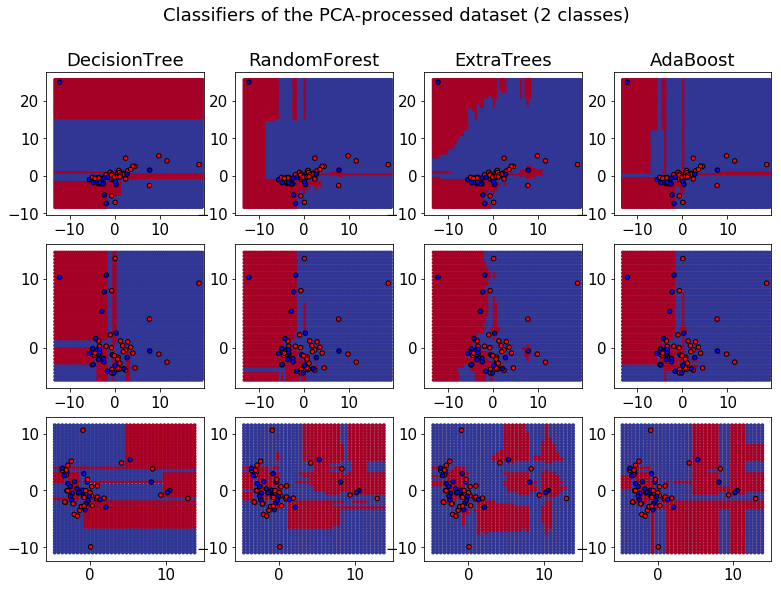

In [115]:


# Parameters
n_classes = 2
n_estimators = 50
cmap = plt.cm.RdYlBu
plot_step = 0.01  # fine step width for decision surface contours
plot_step_coarser = 0.5  # step widths for coarse classifier guesses
RANDOM_SEED = 13  # fix the seed on each iteration

# Load data
#iris = load_iris()

plot_idx = 1

models = [DecisionTreeClassifier(max_depth=None),
          RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=n_estimators, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
          ExtraTreesClassifier(n_estimators=n_estimators),
          AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),
                             n_estimators=n_estimators)]

for pair in ([0, 1], [0, 2], [2, 3]):
    for model in models:
        # We only take the two corresponding features

        X = X_r[:, pair]
        y = cell_type_14

        # Shuffle
        idx = np.arange(X.shape[0])
        np.random.seed(RANDOM_SEED)
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]

        # Standardize
#        mean = X.mean(axis=0)
#        std = X.std(axis=0)
#        X = (X - mean) / std

        # Train
        clf = clone(model)
        clf = model.fit(X, y)

        scores = clf.score(X, y)
        # Create a title for each column and the console by using str() and
        # slicing away useless parts of the string
        model_title = str(type(model)).split(
            ".")[-1][:-2][:-len("Classifier")]

        model_details = model_title
        if hasattr(model, "estimators_"):
            model_details += " with {} estimators".format(
                len(model.estimators_))
        print(model_details + " with features", pair,
              "has a score of", scores)

        plt.subplot(3, 4, plot_idx)
        if plot_idx <= len(models):
            # Add a title at the top of each column
            plt.title(model_title)

        # Now plot the decision boundary using a fine mesh as input to a
        # filled contour plot
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))

        # Plot either a single DecisionTreeClassifier or alpha blend the
        # decision surfaces of the ensemble of classifiers
        if isinstance(model, DecisionTreeClassifier):
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            cs = plt.contourf(xx, yy, Z, cmap=cmap)
        else:
            # Choose alpha blend level with respect to the number
            # of estimators
            # that are in use (noting that AdaBoost can use fewer estimators
            # than its maximum if it achieves a good enough fit early on)
            estimator_alpha = 1.0 / len(model.estimators_)
            for tree in model.estimators_:
                Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
                Z = Z.reshape(xx.shape)
                cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)

        # Build a coarser grid to plot a set of ensemble classifications
        # to show how these are different to what we see in the decision
        # surfaces. These points are regularly space and do not have a
        # black outline
        xx_coarser, yy_coarser = np.meshgrid(
            np.arange(x_min, x_max, plot_step_coarser),
            np.arange(y_min, y_max, plot_step_coarser))
        Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(),
                                         yy_coarser.ravel()]
                                         ).reshape(xx_coarser.shape)
        cs_points = plt.scatter(xx_coarser, yy_coarser, s=15,
                                c=Z_points_coarser, cmap=cmap,
                                edgecolors="none")

        # Plot the training points, these are clustered together and have a
        # black outline
        plt.scatter(X[:, 0], X[:, 1], c=y,
                    cmap=ListedColormap(['b', 'y', 'r']),
                    edgecolor='k', s=20)
        plot_idx += 1  # move on to the next plot in sequence

plt.suptitle("Classifiers of the PCA-processed dataset (2 classes)")
plt.axis("tight")

plt.show()

# Random forest after PCA, only first 2 components: PC1 and PC2

Classifier performance, PC1 & PC2 features only: 0.590163934426
('RandomForest with 100 estimators with features', [0, 1], 'has a score of', 1.0)


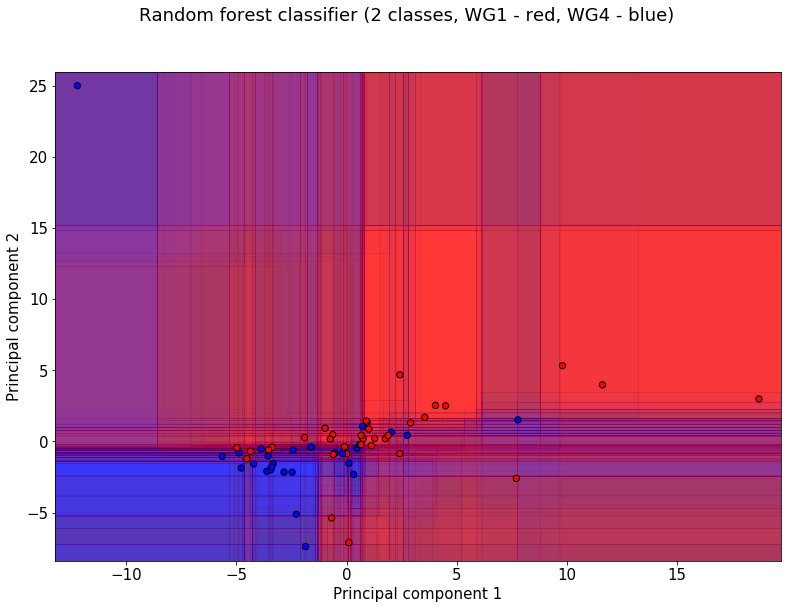

In [117]:
# Plot the decision boundary only for Random forest classifier


# Parameters
n_classes = 2
n_estimators = 100
cmap = plt.cm.RdYlBu
plot_step = 0.02  # fine step width for decision surface contours
plot_step_coarser = 0.5  # step widths for coarse classifier guesses
RANDOM_SEED = 13  # fix the seed on each iteration


model=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=n_estimators, n_jobs=1,
            oob_score=True, random_state=0, verbose=0, warm_start=False)                    


pair=[0,1]

X = X_r[:, pair]
y = cell_type_14



# Shuffle
idx = np.arange(X.shape[0])
np.random.seed(RANDOM_SEED)
np.random.shuffle(idx)
X = X[idx]
y = y[idx]

# Train
clf = clone(model)
clf = model.fit(X, y)

# get the scores of the trees
scores = clf.score(X, y)

# print the model score
print 'Classifier performance, PC1 & PC2 features only: ' + str(clf.oob_score_)

# Create a title for each column and the console by using str() and
# slicing away useless parts of the string
model_title = str(type(model)).split(
    ".")[-1][:-2][:-len("Classifier")]

model_details = model_title
if hasattr(model, "estimators_"):
    model_details += " with {} estimators".format(
        len(model.estimators_))
print(model_details + " with features", pair,
      "has a score of", scores)


# Now plot the decision boundary using a fine mesh as input to a
# filled contour plot
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

# Plot either a single DecisionTreeClassifier or alpha blend the
# decision surfaces of the ensemble of classifiers
if isinstance(model, DecisionTreeClassifier):
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap)
else:
    # Choose alpha blend level with respect to the number
    # of estimators
    # that are in use (noting that AdaBoost can use fewer estimators
    # than its maximum if it achieves a good enough fit early on)
    estimator_alpha = 1.0 / len(model.estimators_)
    for tree in model.estimators_:
        Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=ListedColormap(['b','r']))

# Build a coarser grid to plot a set of ensemble classifications
# to show how these are different to what we see in the decision
# surfaces. These points are regularly space and do not have a
# black outline
xx_coarser, yy_coarser = np.meshgrid(
    np.arange(x_min, x_max, plot_step_coarser),
    np.arange(y_min, y_max, plot_step_coarser))
Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(),
                                 yy_coarser.ravel()]
                                 ).reshape(xx_coarser.shape)
#cs_points = plt.scatter(xx_coarser, yy_coarser, s=15,
#                        c=Z_points_coarser, cmap=cmap,
#                        edgecolors="none")

# Plot the training points, these are clustered together and have a blue-red outline


plt.scatter(X[:, 0], X[:, 1], c=y,
            cmap=ListedColormap(['b','r']),
            edgecolor='k', s=40)

plt.suptitle("Random forest classifier (2 classes, WG1 - red, WG4 - blue)")
plt.axis("tight")
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')

plt.savefig('Random_forest_visualisation.svg', format='svg', dpi=100)

# Running tSNE on the original ephys feature set

Ephys dataset, perplexity=20 in 2.3 sec
Ephys dataset, perplexity=30 in 1.3 sec
Ephys dataset, perplexity=40 in 1 sec


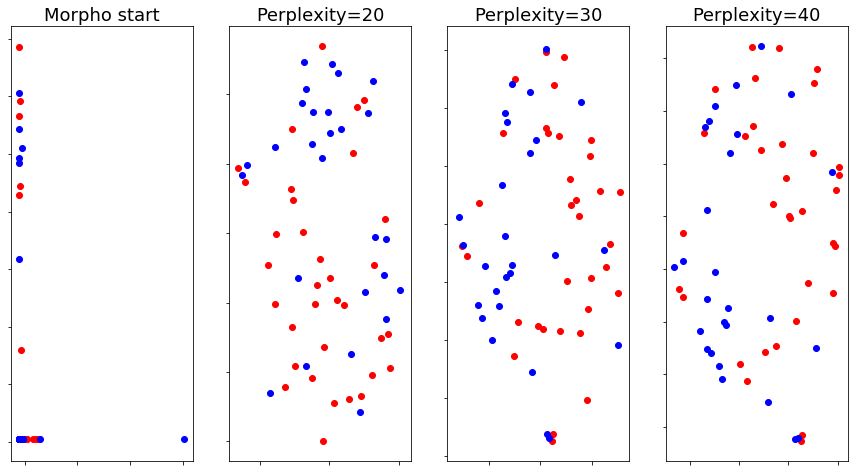

In [121]:


n_samples=len(X)
n_components = 2

perplexities = [20, 30, 40]
(fig, subplots) = plt.subplots(1, len(perplexities)+1, figsize=(15, 8))

X = all_features_new_scaled[:,:]
y = cell_type_14

red = y == 4
blue = y == 1

ax = subplots[0]
ax.scatter(X[red, 0], X[red, 1], c="r")
ax.scatter(X[blue, 0], X[blue, 1], c="b")
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')
ax.set_title('Morpho start')

for i, perplexity in enumerate(perplexities):
    ax = subplots[i + 1]

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=perplexity, metric='cosine',n_iter=20000)
    Y = tsne.fit_transform(X)
    t1 = time()
    print("Ephys dataset, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[red, 0], Y[red, 1], c="r")
    ax.scatter(Y[blue, 0], Y[blue, 1], c="b")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')

plt.show()

# Running tSNE on post-PCA ephys feature set

Morpho dataset, perplexity=30 in 1.3 sec


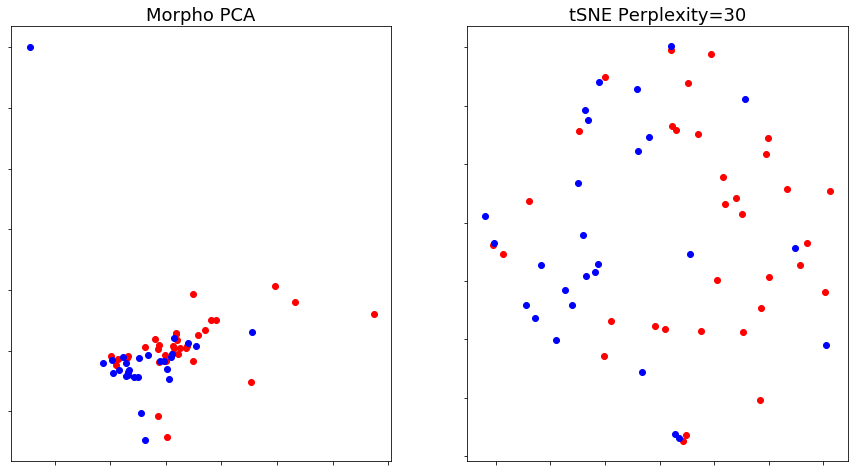

In [122]:

# Aiming to project to 2 componenets
n_components = 2

(fig, subplots) = plt.subplots(1, 2, figsize=(15, 8))
perplexities = [30]


X = X_r[:,:]
y = cell_type_14

red = y == 4
blue = y == 1

ax = subplots[0]
ax.scatter(X[red, 0], X[red, 1], c="r")
ax.scatter(X[blue, 0], X[blue, 1], c="b")
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')
ax.set_title('Morpho PCA')

for i, perplexity in enumerate(perplexities):
    ax = subplots[i + 1]

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=perplexity, metric='cosine',n_iter=20000)
    Y = tsne.fit_transform(X)
    t1 = time()
    print("Morpho dataset, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    ax.set_title(str('tSNE ' ) +"Perplexity=%d" % perplexity)
    ax.scatter(Y[red, 0], Y[red, 1], c="r")
    ax.scatter(Y[blue, 0], Y[blue, 1], c="b")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')

    
plt.savefig('tSNE_perplexity_30.eps', format='eps', dpi=300)

#plt.show()

# k-means clustering on the original ephys features: 2 clusters

n_clusters: 2, 	 n_samples 61, 	 n_features 99
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.02s	5261	0.000	0.000	0.000	-0.008	-0.013	0.338
random   	0.01s	5120	0.020	0.162	0.035	0.009	0.003	0.602
PCA-based	0.00s	5278	0.103	0.102	0.102	0.128	0.091	0.120
__________________________________________________________________________________


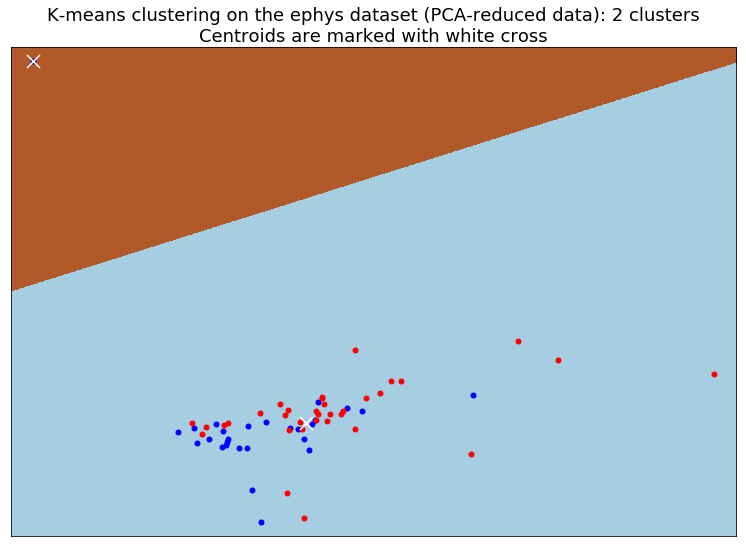

In [123]:
# run k-means on the code: 2 clusters

from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

np.random.seed(20)

#digits = load_digits()
#data = scale(digits.data)
data = all_features_new_scaled

n_samples, n_features = data.shape
n_clusters = 2
labels = cell_type_14
#labels = digits.target

sample_size = 60

print("n_clusters: %d, \t n_samples %d, \t n_features %d"
      % (n_clusters, n_samples, n_features))


print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')


def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

bench_k_means(KMeans(init='k-means++', n_clusters=n_clusters, n_init=10),
              name="k-means++", data=data)

bench_k_means(KMeans(init='random', n_clusters=n_clusters, n_init=10),
              name="random", data=data)

# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = PCA(n_components=n_clusters).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_clusters, n_init=1),
              name="PCA-based",
              data=data)
print(82 * '_')

# #############################################################################
# Visualize the results on PCA-reduced data

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_clusters, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

# plot all WG1 
plt.plot(reduced_data[np.where(cell_type_14==1), 0], reduced_data[np.where(cell_type_14==1), 1], 'k.', markersize=10,color='blue')
plt.plot(reduced_data[np.where(cell_type_14==4), 0], reduced_data[np.where(cell_type_14==4), 1], 'k.', markersize=10,color='red')

# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the ephys dataset (PCA-reduced data): 2 clusters\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [ ]:
Y.shape

# k-means clustering on post-tSNE data: 2 clusters

n_clusters: 2, 	 n_samples 61, 	 n_features 2
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.01s	218	0.042	0.042	0.042	0.045	0.030	0.388
random   	0.01s	218	0.042	0.042	0.042	0.045	0.030	0.388
PCA-based	0.00s	226	0.155	0.154	0.155	0.182	0.144	0.357
__________________________________________________________________________________


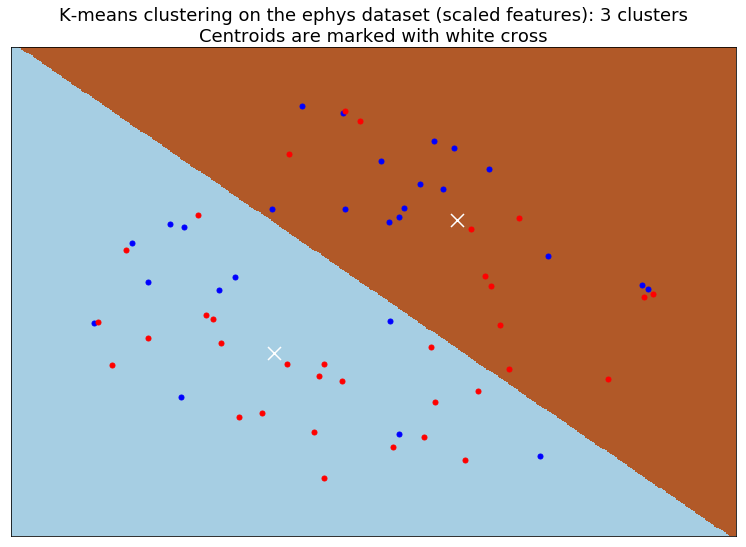

In [124]:
# run k-means on the code: 2 clusters


np.random.seed(42)

data = Y

n_samples, n_features = data.shape
n_clusters = 2
labels = cell_type_14
#labels = digits.target

sample_size = len(all_features_new_scaled)

print("n_clusters: %d, \t n_samples %d, \t n_features %d"
      % (n_clusters, n_samples, n_features))


print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')


def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

bench_k_means(KMeans(init='k-means++', n_clusters=n_clusters, n_init=10),
              name="k-means++", data=data)

bench_k_means(KMeans(init='random', n_clusters=n_clusters, n_init=10),
              name="random", data=data)

# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = PCA(n_components=n_clusters).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_clusters, n_init=1),
              name="PCA-based",
              data=data)
print(82 * '_')

# #############################################################################
# Visualize the results on PCA-reduced data

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_clusters, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

# plot colors according to WG
plt.plot(reduced_data[np.where(cell_type_14==1), 0], reduced_data[np.where(cell_type_14==1), 1], 'k.', markersize=10,color='blue')
plt.plot(reduced_data[np.where(cell_type_14==4), 0], reduced_data[np.where(cell_type_14==4), 1], 'k.', markersize=10,color='red')

# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the ephys dataset (scaled features): 3 clusters\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()